In [1]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, Draw
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
import os
import matplotlib.pyplot as plt

A few settings to make the plots look better

In [2]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')
sns.set(rc={'figure.figsize':(12,8)},font_scale=1.5)
sns.set_style('ticks')

In [3]:
oxrs = [("CHEMBL3098111", "Merck" ),  ("CHEMBL3867477", "Merck" ),  ("CHEMBL2380240", "Rottapharm" ),
             ("CHEMBL3352684", "Merck" ),  ("CHEMBL3769367", "Merck" ),  ("CHEMBL3526050", "Actelion" ),
             ("CHEMBL3112474", "Actelion" ),  ("CHEMBL3739366", "Heptares" ),  ("CHEMBL3739395", "Actelion" ), 
             ("CHEMBL3351489", "Eisai" )]

In [7]:
fps = []
docs = []
companies = []

for cid, company in oxrs:
    sdf_file = os.path.join("data", cid + ".sdf")
    mols = Chem.SDMolSupplier(sdf_file)
    for mol in mols:
        if mol is not None:
            fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2)
            arr = np.zeros((1,))
            DataStructs.ConvertToNumpyArray(fp, arr)
            docs.append(cid)
            companies.append(company)
            fps.append(arr)
fps = np.array(fps)
companies = np.array(companies)
docs = np.array(docs)

In [8]:
fps.shape

(293, 2048)

In [9]:
pca = PCA(n_components=2)
x = pca.fit_transform(fps)

In [10]:
d = pd.DataFrame(x)
d.columns = ["PC1", "PC2"]
d["DOCID"] = docs
d["COMPANY"] = companies 

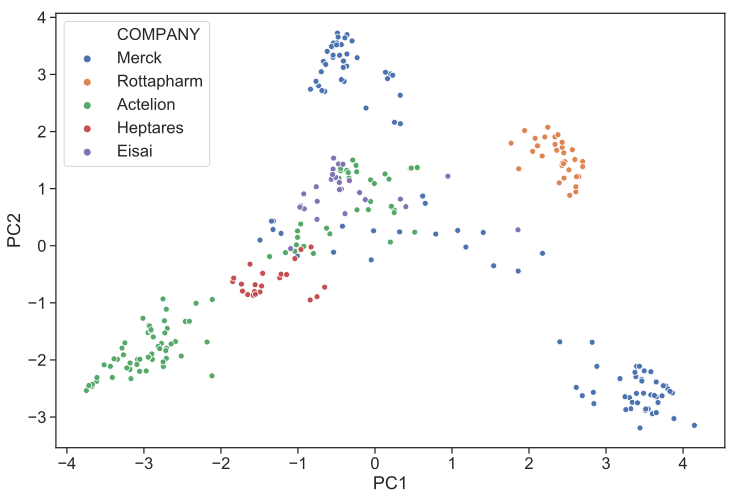

In [11]:
ax = sns.scatterplot(x="PC1", y="PC2", hue="COMPANY", data=d)

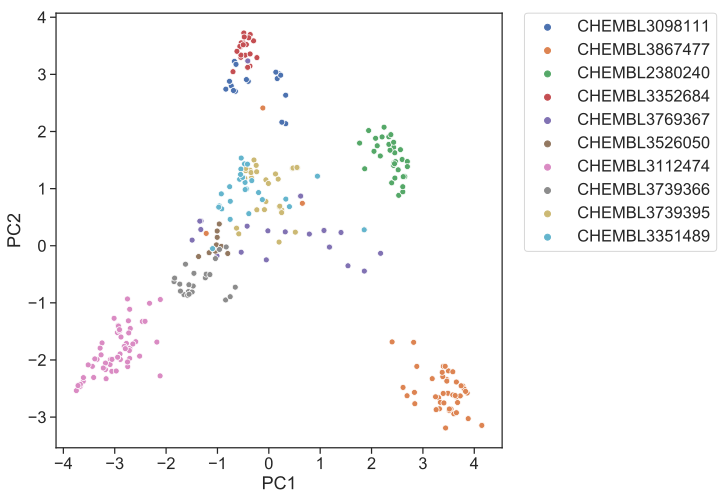

In [12]:
sns.set(rc={'figure.figsize':(8,8)},font_scale=1.5)
sns.set_style('ticks')
ax = sns.scatterplot(x="PC1", y="PC2", hue="DOCID", data=d)
handles, labels = ax.get_legend_handles_labels()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles[1:], labels=labels[1:])

In [13]:
from sklearn.manifold import TSNE

In [14]:
tsne = TSNE(n_components=2, random_state=0)
tx = tsne.fit_transform(fps)

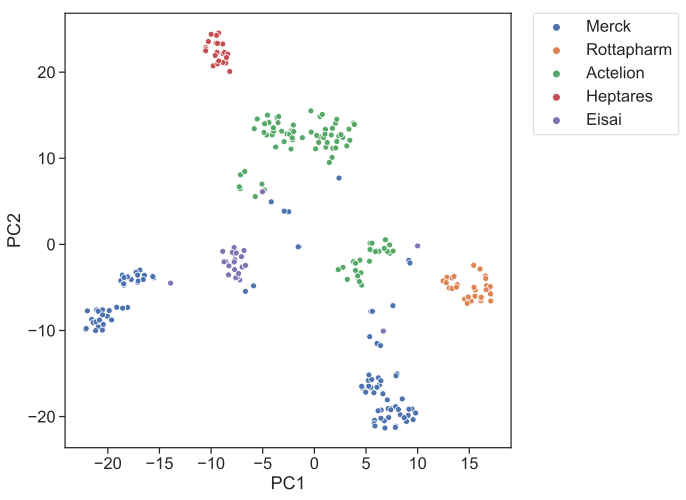

In [17]:
d = pd.DataFrame(tx)
d.columns = ["PC1", "PC2"]
d["DOCID"] = docs
d["COMPANY"] = companies 
ax = sns.scatterplot(x="PC1", y="PC2", hue="COMPANY", data=d)
handles, labels = ax.get_legend_handles_labels()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles[1:], labels=labels[1:])